In [1]:
import pandas as pd
import numbers as np
import seaborn as sns
from matplotlib import pyplot as plt
import joblib

sns.set_style("whitegrid")

In [2]:
df = pd.read_parquet('../assets/SINAN-TB_Brazil_cleaned.parquet')

In [3]:
df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,06/01/2001,Male,Ignored,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,195,66.0
1,16/01/2001,Female,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,35.0
2,16/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,54.0
3,22/01/2001,Male,Admixed,New case,Suspicious,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,181,36.0
4,03/01/2001,Female,Ignored,New case,No accomplished,Not performed,Pulmonary,Ignored,Ignored,Ignored,...,Ignored,Not performed,Ignored,Not performed,Cured,Ignored,Ignored,AC,183,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DT_NOTIFIC          963961 non-null  object 
 1   CS_SEXO             963961 non-null  object 
 2   CS_RACA             963961 non-null  object 
 3   TRATAMENTO          963961 non-null  object 
 4   RAIOX_TORA          963961 non-null  object 
 5   TESTE_TUBE          963961 non-null  object 
 6   FORMA               963961 non-null  object 
 7   AGRAVAIDS           963961 non-null  object 
 8   AGRAVALCOO          963961 non-null  object 
 9   AGRAVDIABE          963961 non-null  object 
 10  AGRAVDOENC          963961 non-null  object 
 11  AGRAVOUTRA          963961 non-null  object 
 12  BACILOSC_E          963961 non-null  object 
 13  BACILOS_E2          963961 non-null  object 
 14  BACILOSC_O          963961 non-null  object 
 15  CULTURA_ES          963961 non-nul

In [5]:
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], dayfirst=True)

In [6]:
df['IDADE'] = df['IDADE'].astype('int')

In [7]:
df['IDADE'].head(2)

0    66
1    35
Name: IDADE, dtype: int64

In [8]:
df['DT_NOTIFIC'].head(2)

0   2001-01-06
1   2001-01-16
Name: DT_NOTIFIC, dtype: datetime64[ns]

In [9]:
numeric_features = df.select_dtypes(include='number')
categorical_features = df.select_dtypes(include='object')
categorical_features.info()
# defining two variables for numerical and categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CS_SEXO     963961 non-null  object
 1   CS_RACA     963961 non-null  object
 2   TRATAMENTO  963961 non-null  object
 3   RAIOX_TORA  963961 non-null  object
 4   TESTE_TUBE  963961 non-null  object
 5   FORMA       963961 non-null  object
 6   AGRAVAIDS   963961 non-null  object
 7   AGRAVALCOO  963961 non-null  object
 8   AGRAVDIABE  963961 non-null  object
 9   AGRAVDOENC  963961 non-null  object
 10  AGRAVOUTRA  963961 non-null  object
 11  BACILOSC_E  963961 non-null  object
 12  BACILOS_E2  963961 non-null  object
 13  BACILOSC_O  963961 non-null  object
 14  CULTURA_ES  963961 non-null  object
 15  HIV         963961 non-null  object
 16  RIFAMPICIN  963961 non-null  object
 17  ISONIAZIDA  963961 non-null  object
 18  ETAMBUTOL   963961 non-null  object
 19  ESTREPTOMI  963961 non-

In [10]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_fit = [(feature, LabelEncoder().fit(df[feature])) for feature in categorical_features]

joblib.dump(labelEncoder_fit, '../assets/labelEncoder_fit.jbl')
# exporting the fitted features from the data tu use later on
# the deployed model

for feature, fit in labelEncoder_fit:
  df[feature] = fit.transform(df[feature])
  # transforming the categorical features from string to 1,2,3...

df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,2001-01-06,1,2,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,195,66
1,2001-01-16,0,0,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,181,35
2,2001-01-16,1,0,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,181,54
3,2001-01-22,1,0,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,181,36
4,2001-01-03,0,2,2,1,2,2,0,0,0,...,0,3,0,3,0,0,0,0,183,14


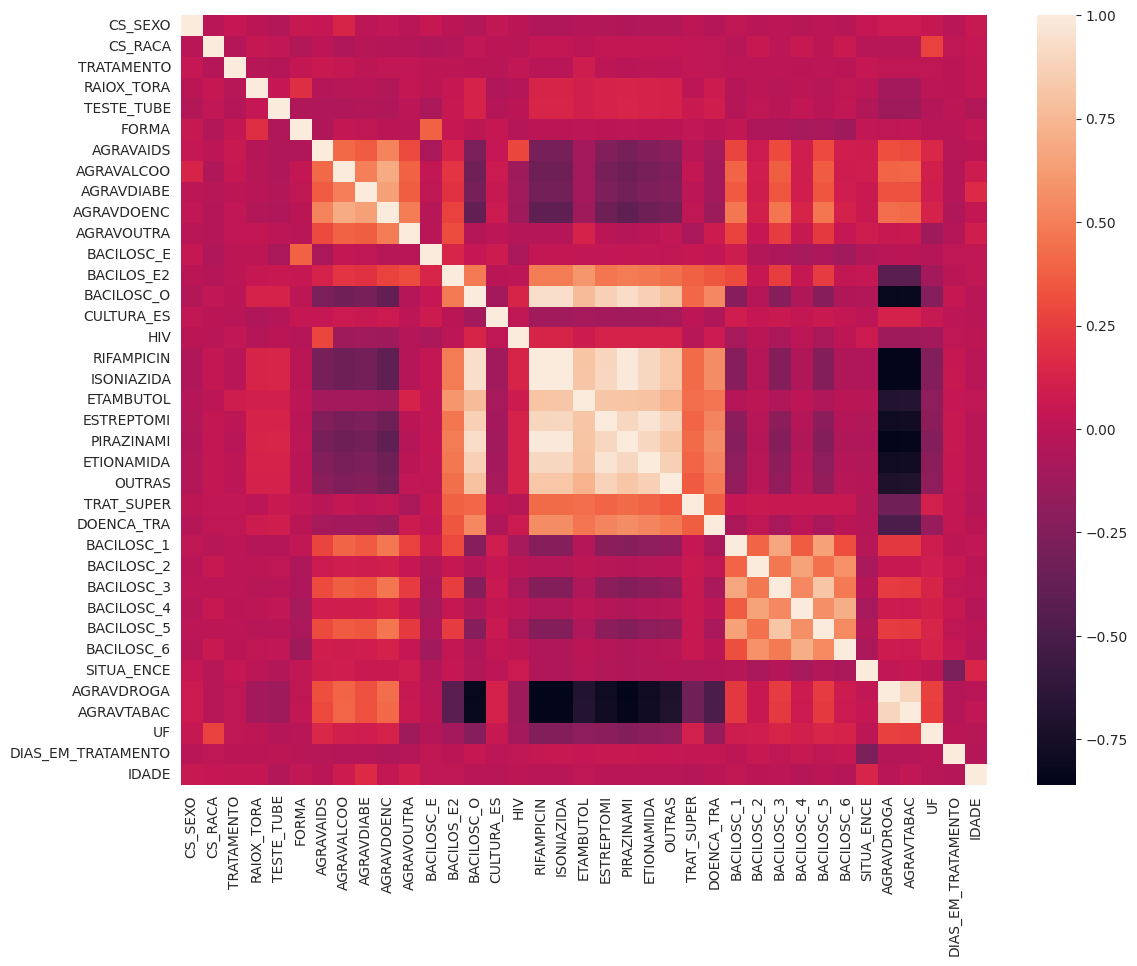

In [11]:
fig, ax = plt.subplots(figsize=(13,10))

ax = sns.heatmap(df.corr(numeric_only=True))

plt.show()

In [12]:
for feature in categorical_features.columns:
  df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963961 entries, 0 to 963960
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DT_NOTIFIC          963961 non-null  datetime64[ns]
 1   CS_SEXO             963961 non-null  category      
 2   CS_RACA             963961 non-null  category      
 3   TRATAMENTO          963961 non-null  category      
 4   RAIOX_TORA          963961 non-null  category      
 5   TESTE_TUBE          963961 non-null  category      
 6   FORMA               963961 non-null  category      
 7   AGRAVAIDS           963961 non-null  category      
 8   AGRAVALCOO          963961 non-null  category      
 9   AGRAVDIABE          963961 non-null  category      
 10  AGRAVDOENC          963961 non-null  category      
 11  AGRAVOUTRA          963961 non-null  category      
 12  BACILOSC_E          963961 non-null  category      
 13  BACILOS_E2          963961 no

In [13]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler_fit = [(feature, MinMaxScaler().fit(df[feature].values.reshape(-1,1))) for feature in numeric_features]

joblib.dump(minMaxScaler_fit, '../assets/minMaxScaler_fit.jbl')
# exporting the fitted features from the data tu use later on
# the deployed model

for feature, scaler in minMaxScaler_fit:
  df[feature] = scaler.transform(df[feature].values.reshape(-1,1))

df.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS_EM_TRATAMENTO,IDADE
0,2001-01-06,1,2,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,0.039723,0.550000
1,2001-01-16,0,0,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,0.036871,0.291667
2,2001-01-16,1,0,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,0.036871,0.450000
3,2001-01-22,1,0,2,4,2,2,0,0,0,...,0,3,0,3,0,0,0,0,0.036871,0.300000
4,2001-01-03,0,2,2,1,2,2,0,0,0,...,0,3,0,3,0,0,0,0,0.037278,0.116667


In [14]:
df.describe()

,DIAS_EM_TRATAMENTO,IDADE
count,963961.000000,963961.000000
mean,0.041741,0.331717
std,0.021073,0.142371
min,0.000000,0.000000
25%,0.036871,0.216667
50%,0.038704,0.316667
75%,0.045019,0.433333
max,1.000000,1.000000
